# Radial Basis Function Network

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from UnsupervisedLearning import Stochastic_K_means
from MultilayerPerceptronNetwork import Train_MLP, Test_MLP
import nn_Utilities as nn

# Note:

- All the code related to neural networks is impleted step by step in the definition files
- No, library such as tensor flow or scikit-learn is used to solve this task
- The Multilayer perceptron used in this code is flexible , i.e, it can used with any architecture of the network.
- Finally, k_means is implmented in stochastic way inorder to deal with the big data(not of relavance in this case)

In [2]:
# Data Intialization
trainingData  = np.loadtxt('RBF_data.txt')

x1 = np.reshape(trainingData[:,1],(-1,1))
x2 = np.reshape(trainingData[:,2],(-1,1))
x = np.concatenate((x1,x2), axis=1)

y = np.reshape(trainingData[:,0],(-1,1))

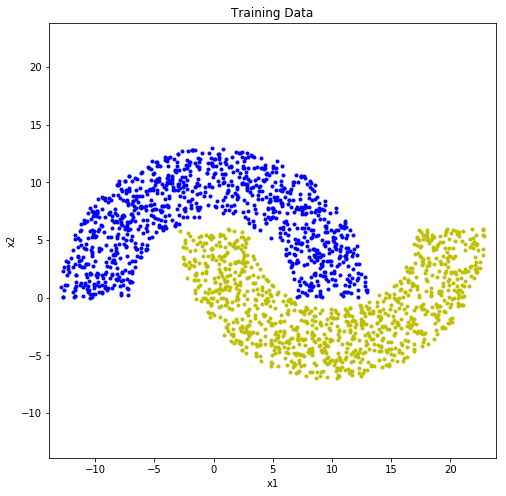

In [3]:
# Visualize data
def inputData_visualization():
    pos = np.where(y== 1) 
    neg = np.where(y==-1)
    a1Pos = x1[pos[0]]
    a1Neg = x1[neg[0]]
    a2Pos = x2[pos[0]]
    a2Neg = x2[neg[0]]
    f, ax = plt.subplots(figsize=(8, 8))
    plt.title('Training Data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(a1Pos,a2Pos,'b.')
    plt.plot(a1Neg,a2Neg,'y.')
    maxi = np.max([np.max(x1),np.max(x2)]) + 1
    mini = np.min([np.min(x1),np.min(x2)]) - 1
    plt.axis([mini,maxi,mini,maxi])
inputData_visualization()
plt.show()

In [3]:
# Unsupervised learning with Stochastic K_means algorithm

# Control parameters
clusters = 10
nPatterns = np.size(y)
inputDimensions = np.size(x,axis=1)

weightMatrixUnsupervised = Stochastic_K_means(inputData = x,nClusters =10,inputDimensions=2,batchSize=2000,checkData=50,updates= 1000)

print(weightMatrixUnsupervised)



Final Variance =  0.0
[[ 15.35167464  -2.21138746]
 [ 19.53263415   2.84451942]
 [  9.51350439  -3.91655096]
 [  0.51849853   2.79665031]
 [  3.78822536  -2.04432777]
 [  3.44526299   9.67481818]
 [ -9.37273307   3.61381841]
 [  9.00012903   4.206025  ]
 [ -2.41238115  20.99931325]
 [ -4.45728721   9.06667442]]


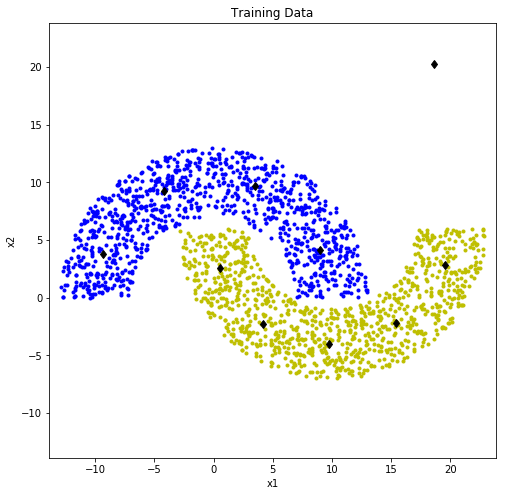

In [11]:
# Visualize data with weights from the k_means

inputData_visualization()
plt.plot(weightMatrixUnsupervised[:,0],weightMatrixUnsupervised[:,1],'kd')
plt.show()

In [4]:
# Radial basis function applied on the k_means output

def GetGaussian(weightMatrix, randomDataPoint):
    x1 = randomDataPoint[:,0]
    x2 = randomDataPoint[:,1]
    wx1 = np.reshape(weightMatrix[:,0],(-1,1))
    wx2 = np.reshape(weightMatrix[:,1],(-1,1))
    eucledianDistanceMatrix = np.sqrt(np.square(wx1-x1) + np.square(wx2-x2))

    allExponentValuesMatrix = np.exp(-np.square(eucledianDistanceMatrix)/2)
    gaussianNeuronMatrix = allExponentValuesMatrix/np.sum(allExponentValuesMatrix,axis=0)
    return gaussianNeuronMatrix


outputUnsupervised = GetGaussian(weightMatrixUnsupervised,x)

In [5]:
#Supervised Multilayer perceptron network

inputSupervised = np.transpose(outputUnsupervised)
arch = {'hiddenLayers': 3,'respectiveHiddenUnits':[4,4,8]}
w2 = Train_MLP(trainingData=inputSupervised,targetOutputs=y,batchSize=100,eta=0.01,architecture=arch,outputClasses=1)

0  Upadtes completed out of 2000 , Energy:  0.507415667955
100  Upadtes completed out of 2000 , Energy:  0.0144758505608
200  Upadtes completed out of 2000 , Energy:  0.0111596561799
300  Upadtes completed out of 2000 , Energy:  0.0102667903444
400  Upadtes completed out of 2000 , Energy:  0.00979593991018
500  Upadtes completed out of 2000 , Energy:  0.00952077251728
600  Upadtes completed out of 2000 , Energy:  0.00928429656575
700  Upadtes completed out of 2000 , Energy:  0.00902145066092
800  Upadtes completed out of 2000 , Energy:  0.00904330259242
900  Upadtes completed out of 2000 , Energy:  0.00822361459932
1000  Upadtes completed out of 2000 , Energy:  0.00812018783517
1100  Upadtes completed out of 2000 , Energy:  0.00796969788742
1200  Upadtes completed out of 2000 , Energy:  0.0077200032956
1300  Upadtes completed out of 2000 , Energy:  0.0075605463261
1400  Upadtes completed out of 2000 , Energy:  0.00748191377721
1500  Upadtes completed out of 2000 , Energy:  0.0074350738

#  Classification by RBF(unsupervised + supervised neural network)

Here the blue and the yellow c's are the input data and output data is picked from the entire plot range so that the hyper plane created by the neural network can be visualized.

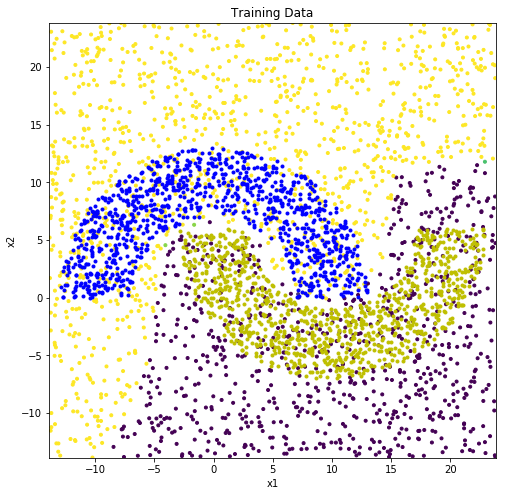

In [12]:

# Pixel wise classification
inputData_visualization()
randomDataSize = 2000
maxi = np.max([np.max(x1),np.max(x2)]) + 1
mini = np.min([np.min(x1),np.min(x2)]) - 1
pixelData = np.random.uniform(mini,maxi,(randomDataSize,inputDimensions))

outputUnsupervised = GetGaussian(weightMatrixUnsupervised,pixelData)
inputSupervised = np.transpose(outputUnsupervised)
outputSupervised = nn.FeedForward(inputPatterns=inputSupervised,weightMatrix=w2,returnType=2,architecture=arch)
out = np.reshape(outputSupervised,2000)
plt.scatter(pixelData[:,0],pixelData[:,1],c=out,marker='.')
plt.show()